## Import necessary libraries

In [14]:

import geopandas as gpd
import osmnx as ox
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

print("Libraries imported successfully.")

Libraries imported successfully.


## Path configurations

In [2]:
AOI_FILE = "../aoi.geojson"
OUTPUT_DIR = "../data"
OUTPUT_GPKG = os.path.join(OUTPUT_DIR, "osm_coastline.gpkg")
OSM_TAGS = {"natural": "coastline"}

## 1. Create output directory if it doesn't exist

In [3]:
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output directory '{OUTPUT_DIR}' is ready.")

Output directory '../data' is ready.


## 2. Load Area of Interest (AOI)

In [5]:
try:
    print(f"Loading AOI from {AOI_FILE}...")
    aoi_gdf = gpd.read_file(AOI_FILE)
    print("AOI loaded successfully.")
except Exception as e:
    print(f"Error loading AOI file: {e}")
    print("Please ensure the AOI file exists and is a valid GeoJSON.")
    raise e

Loading AOI from ../aoi.geojson...
AOI loaded successfully.


### Convert AOI to WGS84 (EPSG:4326) if not already in that CRS


In [6]:
aoi_gdf = aoi_gdf.to_crs(epsg=4326)
aoi_geometry = aoi_gdf.unary_union
print(f"AOI converted to WGS84. CRS: {aoi_gdf.crs}")

AOI converted to WGS84. CRS: EPSG:4326


## 3. Download coastline data from OSM

In [7]:
try:
    coastline_gdf = ox.features_from_polygon(
        aoi_geometry,
        tags=OSM_TAGS
    )
except Exception as e:
    print(f"Error downloading coastline data: {e}")
    print('Please check your internet connection and OSMnx installation.')
    raise e

## 4. Verification and filtering of coastline data

In [8]:
if coastline_gdf.empty:
    print("Warning: No coastline data found in the specified AOI.")
    print("Please verify the AOI location and try again.")
else:
    print(f"Downloaded {len(coastline_gdf)} coastline segments.")

    # We keep only LineString and MultiLineString geometries
    coastline_gdf = coastline_gdf[
        coastline_gdf.geometry.geom_type.isin(['LineString', 'MultiLineString'])
    ]
    print(f"Filtered to {len(coastline_gdf)} valid coastline geometries.")

Downloaded 26 coastline segments.
Filtered to 26 valid coastline geometries.


## 5. Save the coastline data to a GeoPackage


In [15]:
try:
    print(f"Saving coastline data to {OUTPUT_GPKG}...")

    # Clean the GeoDataFrame by removing columns with unsupported types
    coastline_gdf.copy()

    # Keep only geometry and simple string/numeric columns
    for col in coastline_clean.columns:
        if col != 'geometry':
            # Convert lists and complex types to strings
            if coastline_clean[col].apply(lambda x: isinstance(x, (list, dict))).any():
                coastline_clean[col] = coastline_clean[col].astype(str)

    coastline_clean.to_file(OUTPUT_GPKG, driver="GPKG")
    print("Coastline data saved successfully.")

except Exception as e:
    print(f"Error saving coastline data: {e}")
    raise e


Saving coastline data to ../data/osm_coastline.gpkg...
Coastline data saved successfully.


## 6. Plot the coastline data for visual verification

Loading saved coastline data for visualization...
Data loaded from ../data/osm_coastline.gpkg.
Number of coastline features: 26
CRS : EPSG:4326


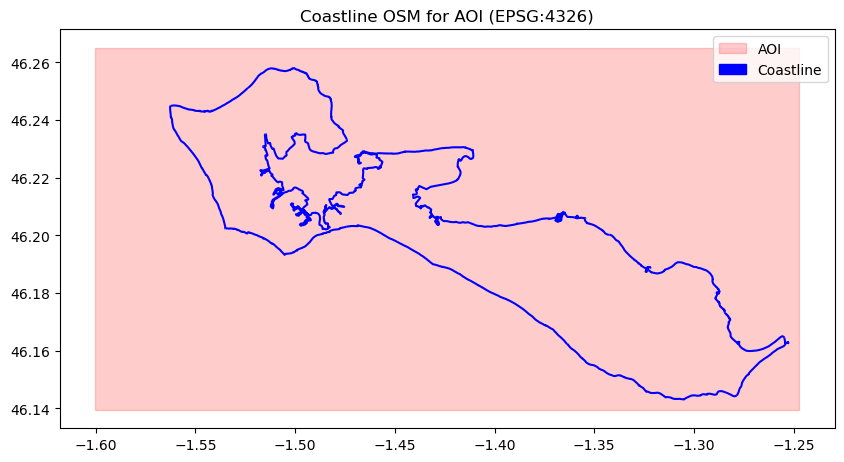

In [19]:
print("Loading saved coastline data for visualization...")

try:
    saved_coastline = gpd.read_file(OUTPUT_GPKG)

    print(f"Data loaded from {OUTPUT_GPKG}.")
    print(f"Number of coastline features: {len(saved_coastline)}")
    print(f"CRS : {saved_coastline.crs}")

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f"Coastline OSM for AOI (EPSG:{saved_coastline.crs.to_epsg()})")

    # Display the AOI (in red)
    aoi_gdf.plot(ax=ax, color='red', edgecolor='red', alpha=0.2, label="AOI")

    # Display the coastline (in blue)
    saved_coastline.plot(ax=ax, color='blue', label="Coastline")

    legend_elements = [
        Patch(facecolor='red', edgecolor='red', alpha=0.2, label='AOI'),
        Patch(facecolor='blue', edgecolor='blue', label='Coastline')
    ]
    ax.legend(handles=legend_elements)

    plt.show()
    plt.show()

except Exception as e:
    print(f"Error during visualization: ")
    print(e)